In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [ ]:
#Displaying Image Directly
Image(filename="v.jpeg")

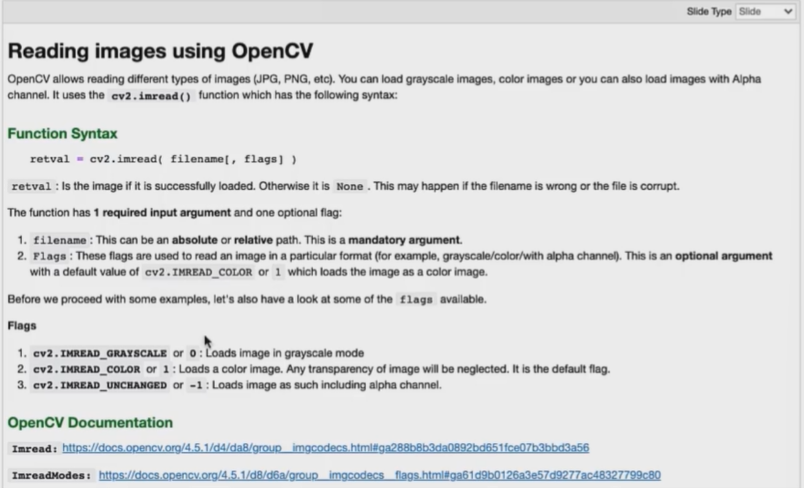

In [9]:
#Read image as gray scale
cb_img = cv2.imread("v.jpeg",0)

#print the image data(pixel values), element of a 2D numpy array
#each pixel value is 8-bits [0,255]
print(cb_img)

[[88 88 88 ... 58 58 58]
 [88 88 89 ... 58 58 58]
 [89 89 89 ... 58 58 58]
 ...
 [22 20 19 ... 19 18 19]
 [19 18 17 ... 19 18 20]
 [19 17 18 ... 19 18 19]]


In [10]:
print("Image size is", cb_img.shape)
print("Image data-type is", cb_img.dtype)

Image size is (1003, 617)
Image data-type is uint8


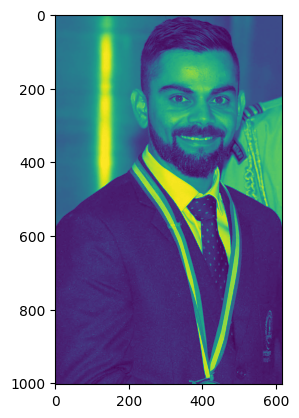

In [11]:
plt.imshow(cb_img)

###What happened here was even though the image was read in as a gray scale img, it won't necessarily display in gray scale when using *imshow()* . matplotlib uses different color maps and it's possible that the gray scale color map is not set.

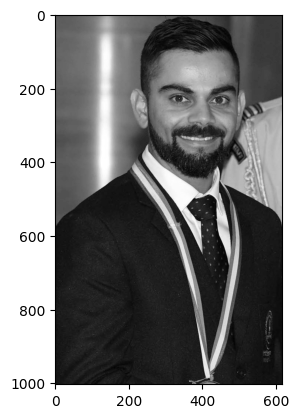

In [12]:
#displaying img as gray

plt.imshow(cb_img, cmap="gray") #cmap - color map

#WORKING WITH COLOR IMAGES

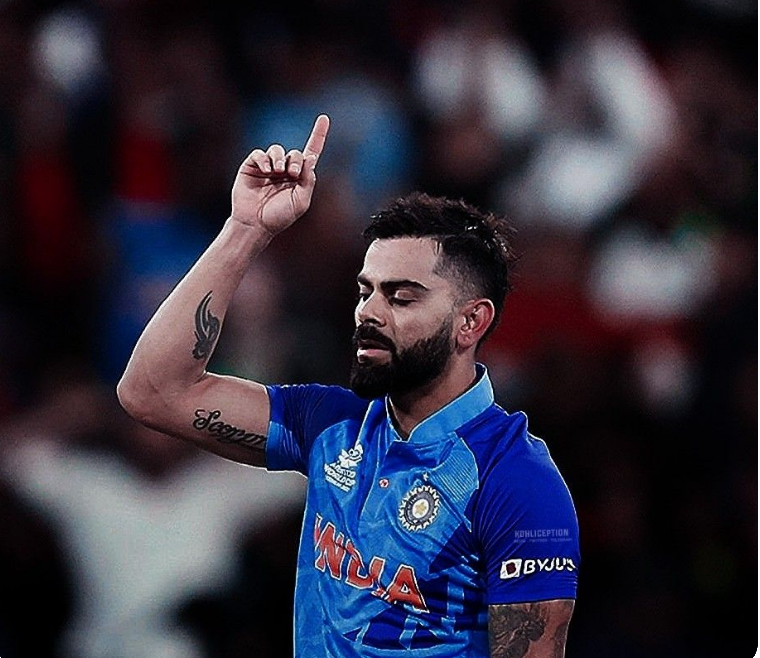

In [13]:
Image("ss.png")

In [19]:
vk_img = cv2.imread("ss.png",1)
print(vk_img)

[[[ 28  20  27]
  [ 29  22  29]
  [ 30  23  29]
  ...
  [ 26  20  21]
  [255 255 255]
  [255 255 255]]

 [[ 23  17  22]
  [ 24  17  24]
  [ 26  20  27]
  ...
  [ 24  19  20]
  [255 255 255]
  [255 255 255]]

 [[ 25  19  24]
  [ 25  18  25]
  [ 26  20  27]
  ...
  [ 20  16  17]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 16   7   3]
  [ 13   7   2]
  [ 13   6   2]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 32  25  23]
  [ 15   6   2]
  [ 14   6   2]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [ 13   6   3]
  [ 14   6   2]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [20]:
print("Image size:", vk_img.shape)
print("Datatype:", vk_img.dtype)

Image size: (658, 760, 3)
Datatype: uint8


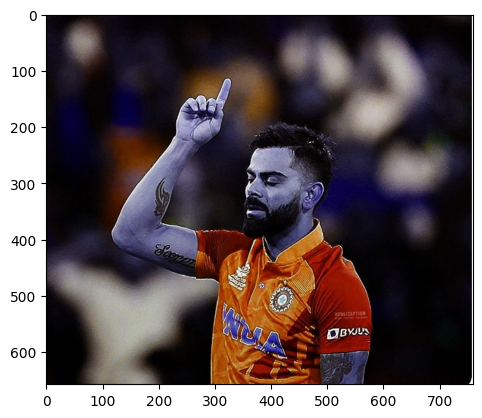

In [21]:
plt.imshow(vk_img)

The color displayed above from the actual image is bcz matplotlib expects the img in RGB format whereas OPENCV stores images in form of BGR. Thus, for correct display, we need to reverse the channel of the image. we will discuss abouut the channels in the sections below.

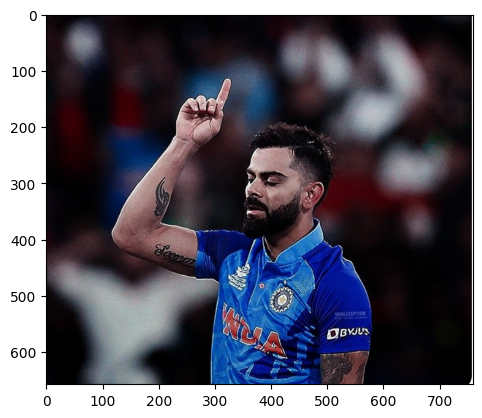

In [22]:
vk_img_reversed = vk_img[:, :, ::-1]
plt.imshow(vk_img_reversed)

##Spliting and Merging Color Channels

cv2.split() : Divides a multi-channel array into several single-channel arrays.

cv2.merge() : Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

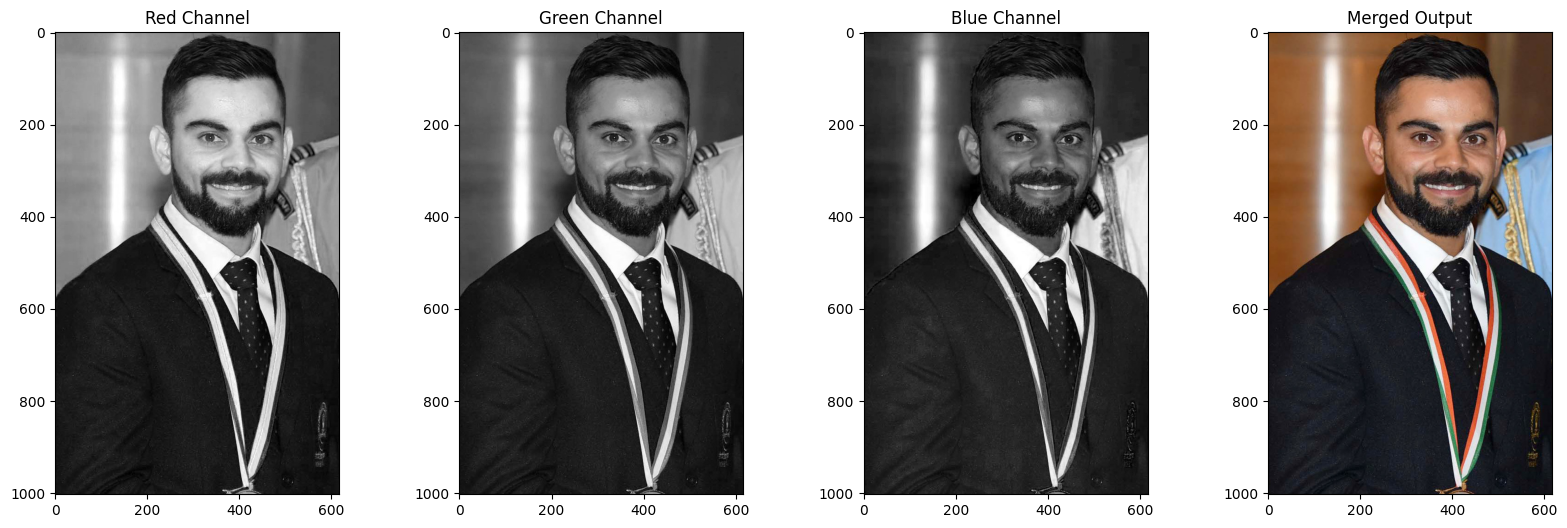

In [25]:
#Spliting the imgs into B,G,R components
img_ns = cv2.imread("v.jpeg", cv2.IMREAD_COLOR) #cv2.IMREAD_COLOR – It specifies to load a color image
b,g,r = cv2.split(img_ns)

plt.figure(figsize=[20,6])
plt.subplot(141); plt.imshow(r,cmap="gray");plt.title("Red Channel");
#The argument 141 can be interpreted as 1, 4, and 1, representing 1 row, 4 columns and first subplot
plt.subplot(142); plt.imshow(g,cmap="gray");plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap="gray");plt.title("Blue Channel");

#Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))

#Show the merged output
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

##Converting to different Color Spaces

cv2.cvtColor() : converts an img from one color space to another. The function converts an input image from one color space to another. The default color format of OpenCV is often RGB but it is actually BGR(the bytes are reversed). So the first byte in a standard(24-bit) color image will be an 8-bit Blue component, second byte will be Green and third byte will be Red. Then the fourth, fifth, sixth bytes would be the second pixels(Blue, Green, Red) and so on.

Function Syntax:-

dst = cv2.cvtcolor(src, code)

dst: is the output image of same size and depth as "src".

NOTE:- The function has **2 required arguments**

1. "src" input image: 8-bit unsigned, 16-bit unsigned or single-precision floating-point.
2. "code" color space conversion code (see ColorConversionCodes). check out the documentation: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

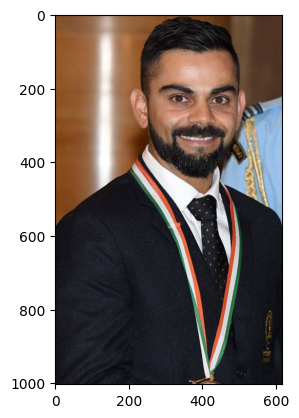

In [26]:
#Converting from BGR to RGB

img_ns_rgb = cv2.cvtColor(img_ns, cv2.COLOR_BGR2RGB)
plt.imshow(img_ns_rgb)

##Changing to HSV color space

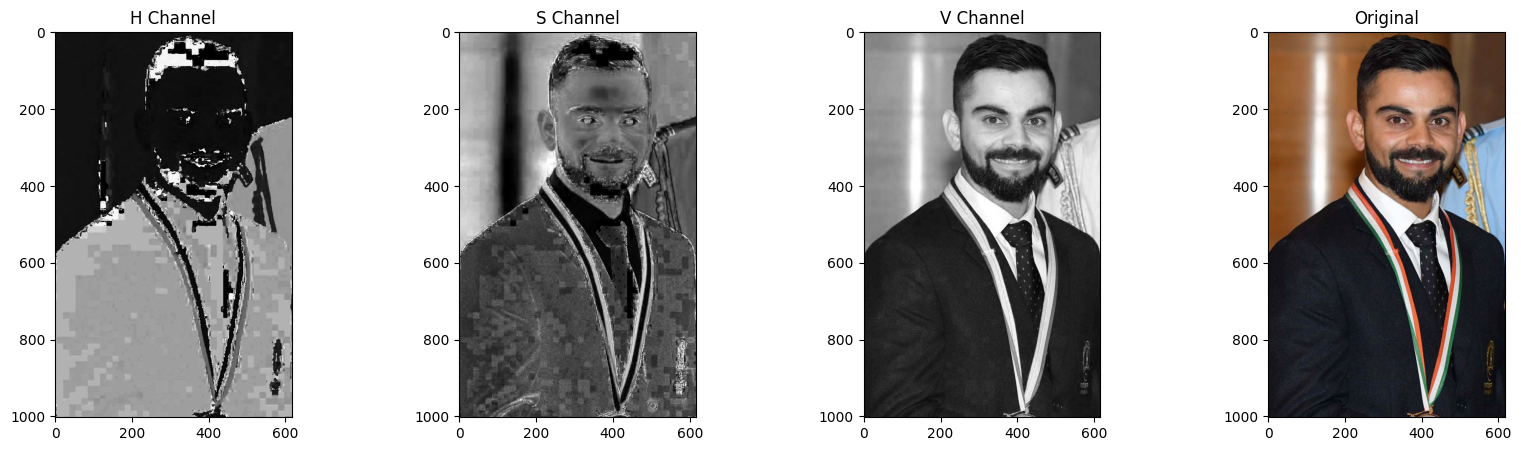

In [28]:
img_hsv = cv2.cvtColor(img_ns, cv2.COLOR_BGR2HSV)
#split img into B,G,R components
h,s,v = cv2.split(img_hsv)

#shows the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_ns_rgb);plt.title("Original");

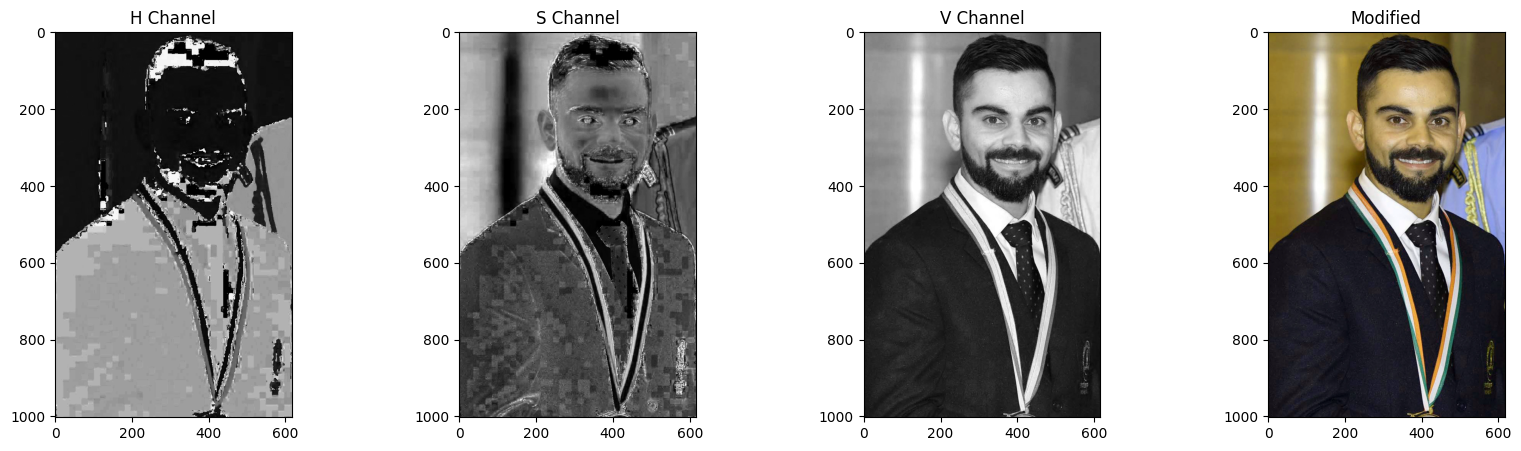

In [29]:
h_new = h+10
img_ns_merged = cv2.merge((h_new,s,v))
img_ns_rgb = cv2.cvtColor(img_ns_merged, cv2.COLOR_HSV2RGB)

#Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_ns_rgb);plt.title("Modified");

##Saving Images

cv2.imwrite()

Function Syntax:-


cv2.imwrite(filename, img[, params] )

This function has **two required arguments**
1. filename - This can be an absolute or relative path.
2. img - image or images to be saved


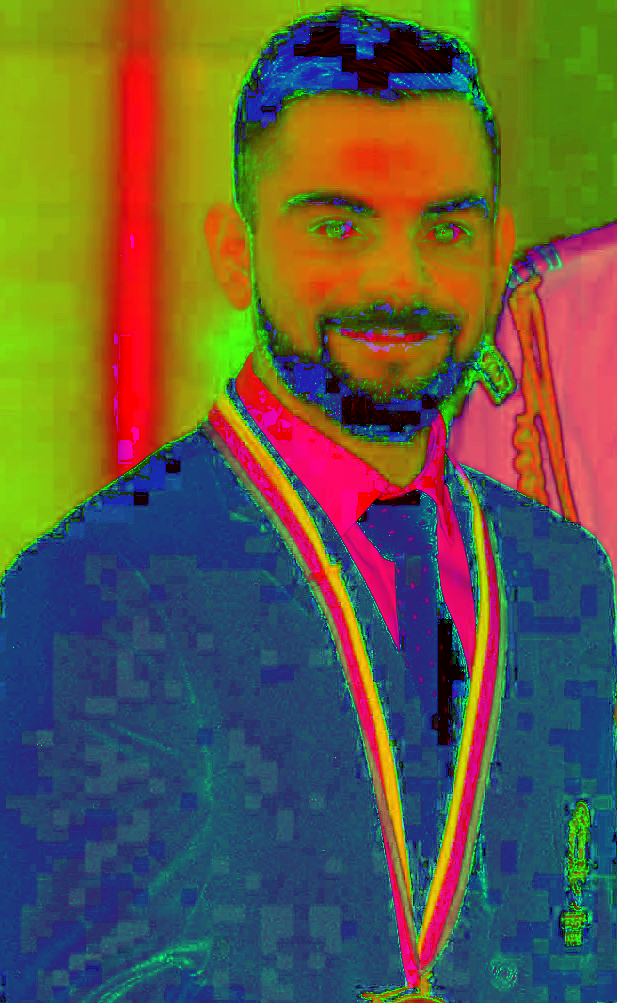

In [33]:
#save the image
cv2.imwrite("ss.png", img_hsv)
Image(filename="ss.png")

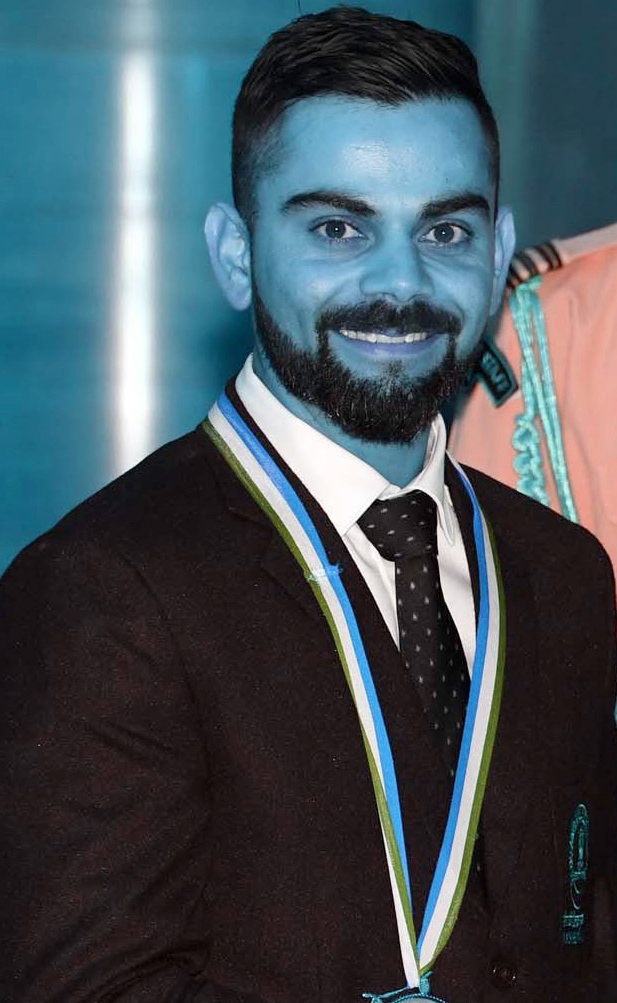

In [34]:
#save the image
cv2.imwrite("ss.png", img_ns_rgb)
Image(filename="ss.png")